In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
tf = 20 # Final time in units where k = 1
dt = 0.01
N = int(tf/dt)

A = np.zeros(N) # True state
A_hat = np.zeros(N) # Estimate
K = np.zeros(N) # Value of Kalman gain
y = np.zeros(N) # Measurements
A2 = np.zeros(N) # Area variance
A_hat2 = np.zeros(N) # Estimate variance
AA_hat = np.zeros(N) # Covariance
p = np.zeros(N) # Estimate variance

In [3]:
k = 1 # Growth rate

A0 = 0.9   # Initial size in units of initial cell size = 1
A_star = 1 # Final size

# Growth noise
d_mag = 1e-4
d2 = d_mag*dt

# Measurement noise
xi_mag = 1.5*d_mag/(k**2)
xi2 = xi_mag/dt

# Initial size
A[0] = A0 

# Initialize variance and covariance
A2[0] = xi2
A_hat2[0] = A2[0]
AA_hat[0] = A2[0]
p[0] = xi2

# Make a measurement
y[0] = A[0] + np.random.normal(loc=0.0, scale=xi2)

# Take this measurement as the estimate because we have no other information
A_hat[0] = y[0]



In [64]:
val = 2 + dt*(k**3)*xi_mag/(d_mag + (k**2 * xi_mag))
#K_range = np.linspace(2+dt*k**3*xi_mag/(d_mag+k**2*xi_mag), 2+dt*k**3*xi_mag/(d_mag+k**2*xi_mag), num=1)
K_range = np.logspace(np.log10(1.1), np.log10(0.9), num=50)
a = np.zeros(50)

for j, K__ in enumerate(K_range):
    K_fixed = K__
    K[0] = K_fixed
    
    for n in range(0, N-1):

        # Update growth noise
        d = np.random.normal(loc=0.0, scale=np.sqrt(d2))

        # Update measurement noise
        xi = np.random.normal(loc=0.0, scale=np.sqrt(xi2))

        # Update the true state
        A[n+1] = -k*dt*(A_hat[n] - A_star) + A[n] + d

        if A[n+1] <= 0: # True size never goes below 0
            A[n+1] = A[n]

        # Predict the variance of the estimate
        p_ = p[n] + d2

        # Predict the true state using the internal model and the previous estimate
        A_hat_ = -k*dt*(A_hat[n] - A_star) + A_hat[n] 

        # Make a measurement
        y[n+1] = A[n+1] + xi

        # Update area variance
        A2[n+1] = ((k*dt)**2)*A_hat2[n] - 2*k*dt*AA_hat[n] + A2[n] + d2

        # Placeholder variables
        AA_hat_ = -k*dt*(1-k*dt)*A_hat2[n] + (1-k*dt)*AA_hat[n]
        A_hat2_ = ((1-k*dt)**2)*A_hat2[n]

        # Calculate optimal Kalman gain 
        K[n+1] = K_fixed
       # K[n+1] = (k*dt*A_hat2_ - (k*dt+1)*AA_hat_ + A2[n+1])/(k*dt*A_hat2_-2*k*dt*AA_hat_+k*dt*A2[n+1]+k*dt*xi2)
       # K[n+1] = p_ / (p_ + xi2)
        K_ = K[n+1]
        
        # Update variance and covariance
        A_hat2[n+1] = (1-K_)**2*A_hat2_ + K_**2*A2[n+1] + 2*K_*(1-K_)*AA_hat_ + K_**2*xi2
        AA_hat[n+1] = (1-K_)*AA_hat_ + K_*A2[n+1]

        # Update estimate
        A_hat[n+1] = (1-K_)*A_hat_+K_*y[n+1]

        # Update the error variance (estimate)
        p[n+1] = (1 - K_)**2*p_+K_**2*xi2
        
    a[j]=A2[-1]

In [65]:
K_range

array([1.1       , 1.09550436, 1.09102709, 1.08656812, 1.08212738,
       1.07770478, 1.07330026, 1.06891374, 1.06454515, 1.06019441,
       1.05586145, 1.0515462 , 1.04724859, 1.04296854, 1.03870599,
       1.03446085, 1.03023307, 1.02602256, 1.02182926, 1.0176531 ,
       1.01349401, 1.00935191, 1.00522674, 1.00111844, 0.99702692,
       0.99295213, 0.98889398, 0.98485243, 0.98082739, 0.9768188 ,
       0.97282659, 0.96885071, 0.96489106, 0.96094761, 0.95702027,
       0.95310898, 0.94921367, 0.94533429, 0.94147076, 0.93762302,
       0.933791  , 0.92997465, 0.92617389, 0.92238867, 0.91861892,
       0.91486457, 0.91112557, 0.90740185, 0.90369335, 0.9       ])

In [66]:
a

array([0.00012569, 0.00012569, 0.00012568, 0.00012568, 0.00012568,
       0.00012567, 0.00012567, 0.00012567, 0.00012567, 0.00012566,
       0.00012566, 0.00012566, 0.00012565, 0.00012565, 0.00012565,
       0.00012565, 0.00012564, 0.00012564, 0.00012564, 0.00012564,
       0.00012564, 0.00012563, 0.00012563, 0.00012563, 0.00012563,
       0.00012562, 0.00012562, 0.00012562, 0.00012562, 0.00012562,
       0.00012561, 0.00012561, 0.00012561, 0.00012561, 0.00012561,
       0.00012561, 0.0001256 , 0.0001256 , 0.0001256 , 0.0001256 ,
       0.0001256 , 0.0001256 , 0.0001256 , 0.00012559, 0.00012559,
       0.00012559, 0.00012559, 0.00012559, 0.00012559, 0.00012559])

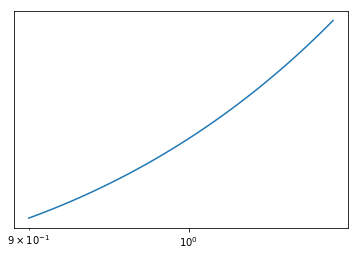

In [68]:
plt.loglog(K_range, a)

In [69]:
mi = K_range[np.argmin(a)]
mi

0.9

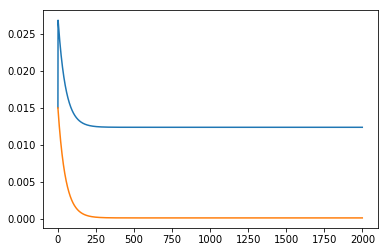

In [70]:
plt.plot(A_hat2)
plt.plot(AA_hat)

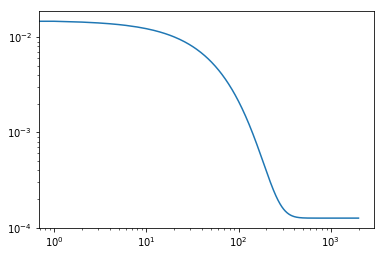

In [71]:
plt.loglog(A2)

Text(0.5, 1.0, 'Kalman gain')

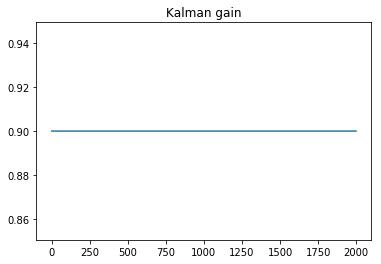

In [72]:
fig = plt.figure()
plt.plot(K)
plt.title('Kalman gain')

(0.8, 1.2)

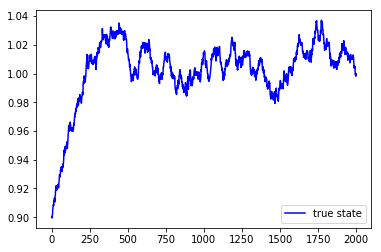

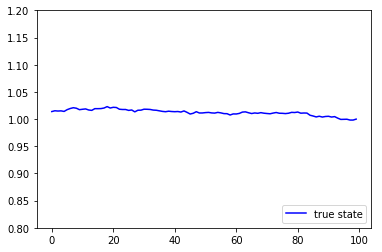

In [73]:
fig, ax = plt.subplots()
#ax.plot(A_hat, label='estimated state with Kalman filter', color='red')
ax.plot(A, label='true state', color='blue')

#ax.fill_between(x=range(0, N), y1=A_hat-2*np.sqrt(xi_all), y2=A_hat+2*np.sqrt(xi_all), facecolor='blue', alpha=0.3, label='estimator variance using only measurements')
#ax.fill_between(x=range(0, N), y1=A_hat-2*np.sqrt(p), y2=A_hat+2*np.sqrt(p), facecolor='orange', alpha=0.9, label='estimator variance using Kalman filter')
ax.legend(loc='lower right')
#ax.set_ylim(bottom=0, top=1.1)

fig, ax = plt.subplots()
#ax.plot(A_hat[-100:], label='estimated state with Kalman filter', color='red')
ax.plot(A[-100:], label='true state', color='blue')

#ax.fill_between(x=range(0, N), y1=A_hat-2*np.sqrt(xi_all), y2=A_hat+2*np.sqrt(xi_all), facecolor='blue', alpha=0.3, label='estimator variance using only measurements')
#ax.fill_between(x=range(0, N), y1=A_hat-2*np.sqrt(p), y2=A_hat+2*np.sqrt(p), facecolor='orange', alpha=0.9, label='estimator variance using Kalman filter')
ax.legend(loc='lower right')
ax.set_ylim(bottom=0.8, top=1.2)

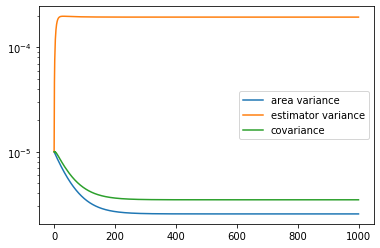

In [198]:
fig, ax = plt.subplots()
ax.plot(A2, label='area variance')
ax.plot(A_hat2, label='estimator variance')
ax.plot(AA_hat, label='covariance')
#ax.set_ylim(bottom=0, top=0.01)
ax.legend()
ax.set_yscale('log')


# Check area variance

In [67]:
analytic_1 = d_mag/(2*k) + (d_mag*xi_mag)**(1/2)
analytic_2 = (d_mag + k**2*xi_mag)/(2*k) + (1/4)*(d_mag + k**2*xi_mag)*dt
print(analytic_1, analytic_2)
A2[-1]

6.25e-06 6.562500000000001e-06


6.578947448715245e-06

In [384]:
(A2[-1] - analytic_2)/(dt**2)

-0.0074550624293366185

# Check estimator variance

In [345]:
analytic_2 = xi_mag/dt - (3*k*xi_mag)/2 - (7/4) * k**2 * xi_mag * dt
analytic_1 = (d_mag*xi_mag)/(2*k*xi_mag + 2*(d_mag*xi_mag)**(1/2)) + (
 d_mag*k*(-3*d_mag*k*xi_mag + k**3*xi_mag**2 + 2*d_mag*(d_mag*xi_mag)**(1/2))*dt)/(4*(d_mag - k**2*xi_mag)**2)
print(analytic_1, analytic_2)
A_hat2[-1]

4.5458884297520655e-06 0.009998499824999998


0.009998499848082302

In [346]:
(A_hat2[-1] - analytic_2)/dt**2

0.0023082303429733386

# Check covariance

In [343]:
analytic_2 = (k*xi_mag)/2 - (3/4)*(k**2*xi_mag)*dt 
analytic_1 = (d_mag*k*xi_mag*dt)/(4*(k*xi_mag + (d_mag*xi_mag)**(1/2)))
print(analytic_1, analytic_2)
AA_hat[-1]

2.2727272727272728e-10 4.99925e-07


4.999460822091709e-07

In [344]:
(AA_hat[-1] - analytic_2)/(dt**2)

0.0021082209170898898

# Check Kalman

In [392]:
analytic_2 = 1 - k*dt
analytic_1 = (2*d_mag*dt)/(d_mag*dt + (d_mag**2 * dt**2 + 4*d_mag*xi_mag)**(1/2))
print(analytic_1, analytic_2)
K[-1]

9.999500012500001e-05 0.9999


0.9999999900009997

In [341]:
(K[-1] - analytic_2)/dt**2

-0.9900980479926602